In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

**LOADING DATASET AND VIEWING THE DATA**



In [2]:
# Load the Dataset
data = pd.read_csv("creditcard (1).csv")

#displaying the dataset
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
#discribing the data
print(data.shape)
print(data.describe())

(45646, 31)
               Time            V1            V2            V3            V4  \
count  45646.000000  45646.000000  45646.000000  45646.000000  45646.000000   
mean   27545.441331     -0.237544      0.028942      0.696718      0.191505   
std    12907.770469      1.886548      1.613070      1.530553      1.403936   
min        0.000000    -56.407510    -72.715728    -32.965346     -5.172595   
25%    19891.000000     -0.985248     -0.543868      0.222804     -0.714566   
50%    32447.000000     -0.246259      0.088873      0.801638      0.191835   
75%    37571.750000      1.157412      0.739723      1.434911      1.070924   
max    42437.000000      1.960497     18.183626      4.101716     16.491217   

                 V5            V6            V7            V8            V9  \
count  45646.000000  45645.000000  45645.000000  45645.000000  45645.000000   
mean      -0.248407      0.098588     -0.117937      0.053331      0.157893   
std        1.414608      1.308548      

**DATA PREPROCESSING**

In [4]:
# Drop rows where 'Class' is NaN
data = data.dropna(subset=['Class'])
#remove rows from a DataFrame where the value in the Class column is missing (NaN)

from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""
x = feature matrix(independent variables)
y = target vector(dependent variable)
train_test_split = splits the dataset into two subsets one for training the model and one for testing the model's performance
test_size=0.2 = 20% of the data will be allocated to the test set, and the remaining 80% will be used for training.
random_state=2 = This is the seed for the random number generator, which controls the shuffling of the data before splitting. Setting the random_state ensures that the split
                 is reproducible, meaning you'll get the same train-test split every time you run the code with that seed. If you omit it, you might get a different split each time.

"reproducible" refers to the ability to generate the exact same results each time the code is executed. This is particularly important for tasks like model training and evaluation,
where consistency is key for debugging, comparison, and results verification.

X_train: This contains the features for the training set.
X_test: This contains the features for the test set.
Y_train: This contains the labels for the training set.
Y_test: This contains the labels for the test set.
"""

'\nx = feature matrix(independent variables)\ny = target vector(dependent variable)\ntrain_test_split = splits the dataset into two subsets one for training the model and one for testing the model\'s performance\ntest_size=0.2 = 20% of the data will be allocated to the test set, and the remaining 80% will be used for training.\nrandom_state=2 = This is the seed for the random number generator, which controls the shuffling of the data before splitting. Setting the random_state ensures that the split\n                 is reproducible, meaning you\'ll get the same train-test split every time you run the code with that seed. If you omit it, you might get a different split each time.\n\n"reproducible" refers to the ability to generate the exact same results each time the code is executed. This is particularly important for tasks like model training and evaluation,\nwhere consistency is key for debugging, comparison, and results verification.\n\nX_train: This contains the features for the tr

**VISUALIZATION USING OF DATA USING HEATMAP**

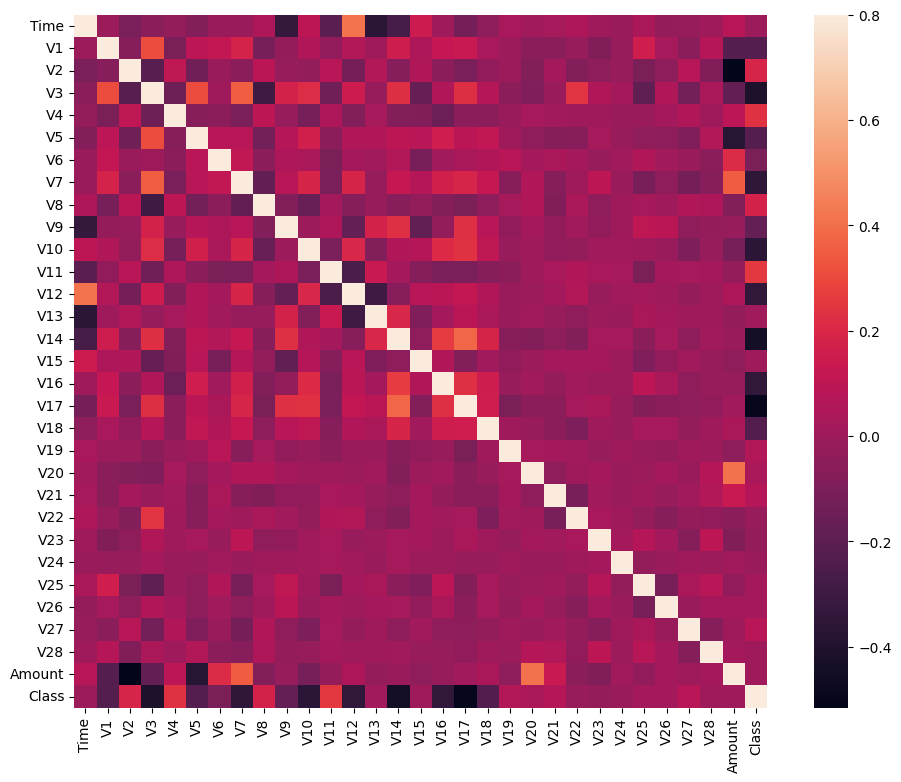

In [5]:
corrmat = data.corr()
#correlation matrix gives you a way to see the relationships between multiple variables at once.
fig = plt.figure(figsize = (12, 9))
#corrmat - variable contains the correlation coefficients between all pairs of numerical columns in your data DataFrame.
#vmax - parameter controls the maximum value for the color scale (color intensity) in the heatmap.
#square - parameter forces the heatmap to have square-shaped cells, making the rows and columns equally spaced
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

**DATA SCALING**

In [ ]:
#fit - methods helps in fitting the data into a modal
#trasnform - methods help in transforming the data into a form that is more suitable for modal
#fit_transform - combination of both fit and trasform

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Scaling the data is an important preprocessing step for the KNN algorithm because the algorithm is distance-based.
#If the data is not scaled, features with larger scales will dominate the distance calculation and can result in incorrect classifications.

**MODEL TRAINING AND EVALUATION**

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print classification report
# used to evaluate the performance of a classification model.
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print accuracy score
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

# Precision is the ratio of correctly predicted positive observations to the total predicted positives
# Recall is the ratio of correctly predicted positive observations to the total actual positives.
# F1 score is the harmonic mean of precision and recall, providing a single metric that balances both concerns.
# Support is the number of actual occurrences of the class in the dataset.
# Accuracy is the ratio of correct predictions (both true positives and true negatives) to the total number of predictions.

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9096
         1.0       1.00      0.88      0.94        33

    accuracy                           1.00      9129
   macro avg       1.00      0.94      0.97      9129
weighted avg       1.00      1.00      1.00      9129

Accuracy Score:  0.9995618359075473


**CONFUSTION MATRIX AND VISUALIZATION**

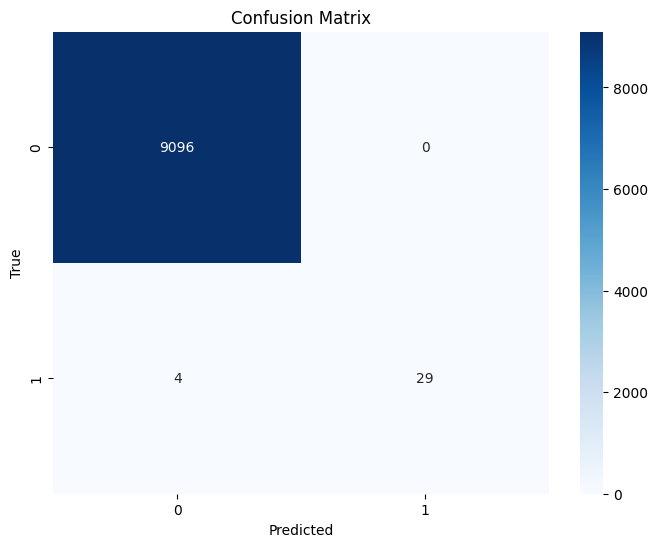

In [9]:
from sklearn.metrics import confusion_matrix

#A confusion matrix is a tool used to evaluate the performance of a classification model

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#annot - argument adds annotations inside each cell of the heatmap
#fmt - argument specifies the formatting of the annotations.
#      'd' stands for decimal integer format, so the numbers in the heatmap will be displayed as integers